## Implentation of Logistic regression 

In [1]:
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [10]:
df = pd.DataFrame(data = dataset.data, columns= dataset.feature_names)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
df['target'] = dataset.target

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [21]:
df[df.duplicated()]

# this could be or could not be a duplicate, but for now just keep as it is 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


Text(0.5, 1.0, 'petal length vs petal width')

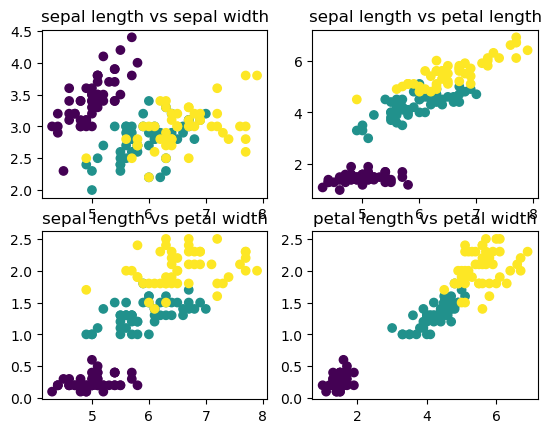

In [43]:

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
axs[0,0].set_title('sepal length vs sepal width')
axs[0,1].scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['target'])
axs[0,1].set_title('sepal length vs petal length')
axs[1,0].scatter(df['sepal length (cm)'], df['petal width (cm)'], c=df['target'])
axs[1,0].set_title('sepal length vs petal width')
axs[1,1].scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'])
axs[1,1].set_title('petal length vs petal width')

 This is a classification problem and we have three classes 

So instead of taking all three first we apply the logistic regression on first two catergories of flowers 


In [46]:
df_binary = df[df['target'] != 2]

In [47]:
df_binary.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dependent and Independent features 

In [48]:
X = df_binary.iloc[:,:-1]
y = df_binary.iloc[:,-1]

In [50]:
X, y

(    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                 5.1               3.5                1.4               0.2
 1                 4.9               3.0                1.4               0.2
 2                 4.7               3.2                1.3               0.2
 3                 4.6               3.1                1.5               0.2
 4                 5.0               3.6                1.4               0.2
 ..                ...               ...                ...               ...
 95                5.7               3.0                4.2               1.2
 96                5.7               2.9                4.2               1.3
 97                6.2               2.9                4.3               1.3
 98                5.1               2.5                3.0               1.1
 99                5.7               2.8                4.1               1.3
 
 [100 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
classifier = LogisticRegression()

In [53]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=100)

In [63]:
X_train, X_test

(    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 29                4.7               3.2                1.6               0.2
 83                6.0               2.7                5.1               1.6
 82                5.8               2.7                3.9               1.2
 43                5.0               3.5                1.6               0.6
 28                5.2               3.4                1.4               0.2
 ..                ...               ...                ...               ...
 79                5.7               2.6                3.5               1.0
 87                6.3               2.3                4.4               1.3
 67                5.8               2.7                4.1               1.0
 24                4.8               3.4                1.9               0.2
 8                 4.4               2.9                1.4               0.2
 
 [80 rows x 4 columns],
     sepal length (cm)  sepal width (c

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [67]:
y_pred = classifier.predict(X_test_scaled)

In [68]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [69]:
# confusion matrix, accuracy score, classification report 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [71]:
print( confusion_matrix(y_pred= y_pred, y_true= y_test))
print(accuracy_score(y_pred= y_pred, y_true= y_test))
print( classification_report(y_pred= y_pred, y_true= y_test))

[[11  0]
 [ 0  9]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## For multiclass classification 
- for multiclass classification we will use class as multinomial and solver as 'lbfgs'
- There are two techniques for multiclass classification
1. One versus rest - in this technique, model will consider the one class and other classes combined, so it will work as binary problem 
2. multinomial 

In [158]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=1)

In [164]:
X_train_scaled = scaler.fit_transform(X_train)

In [165]:
X_test_scaled = scaler.transform(X_test)

In [166]:
multinomial = LogisticRegression(multi_class= 'multinomial', solver='lbfgs')

In [167]:
multinomial.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial')

In [168]:
y_pred = multinomial.predict(X_test_scaled)

In [169]:
print( confusion_matrix(y_pred= y_pred, y_true= y_test))
print(accuracy_score(y_pred= y_pred, y_true= y_test))
print( classification_report(y_pred= y_pred, y_true= y_test))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [171]:
ovr = LogisticRegression(multi_class= 'ovr', solver='lbfgs')

In [172]:
ovr.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr')

In [173]:
y_pred = multinomial.predict(X_test_scaled)

In [174]:
print( confusion_matrix(y_pred= y_pred, y_true= y_test))
print(accuracy_score(y_pred= y_pred, y_true= y_test))
print( classification_report(y_pred= y_pred, y_true= y_test))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



- Similar accuracy with both the models and we can do classification for multiple classes

### Hyper-parameter tuning

In [72]:
# Grid search CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Normal model also performs really well with above dataset and then we wont get to see any difference here, so inorder to look for a change we will use new dataset called diabetes

In [75]:
db = pd.read_csv('diabetes.csv')

In [78]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [82]:
X = db.iloc[:, :-1]
y = db.iloc[:, -1]

In [83]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=12)

In [89]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
50,1,103,80,11,82,19.4,0.491,22
467,0,97,64,36,100,36.8,0.600,25
201,1,138,82,0,0,40.1,0.236,28
258,1,193,50,16,375,25.9,0.655,24
416,1,97,68,21,0,27.2,1.095,22
...,...,...,...,...,...,...,...,...
642,6,147,80,0,0,29.5,0.178,50
241,4,91,70,32,88,33.1,0.446,22
253,0,86,68,32,0,35.8,0.238,25
390,1,100,66,29,196,32.0,0.444,42


In [90]:
X_train_scaled = scaler.fit_transform(X_train)

In [91]:
X_test_scaled= scaler.transform(X_test)

In [92]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [94]:
y_test

229    0
235    1
750    1
365    0
449    0
      ..
83     0
227    1
251    0
573    0
321    1
Name: Outcome, Length: 192, dtype: int64

In [95]:
y_pred = classifier.predict(X_test_scaled)

In [96]:
print( confusion_matrix(y_pred= y_pred, y_true= y_test))
print(accuracy_score(y_pred= y_pred, y_true= y_test))
print( classification_report(y_pred= y_pred, y_true= y_test))

[[110  11]
 [ 28  43]]
0.796875
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       121
           1       0.80      0.61      0.69        71

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192



These above results are for untunned model and can be improved, the given accuracy is around 80% 


##### Hyper-parameter tuning 

In [97]:
# Grid search CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [98]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [116]:
# In grid search cv we need to give parameters onto which model will tuned 
parameters={'penalty':('l1','l2','elasticnet',None),'C':[1,10,20], 
            'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga') }

In [117]:
# classifier is an instance of our logistic regressor, cv is K-fold cross validation, and param_grid is parameters
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [118]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=10),
             param_grid={'C': [1, 10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [119]:
# to find the best parameters for our model 
clf.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [152]:
classifier = LogisticRegression(penalty='l2', C=10, solver='newton-cg')

In [153]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=10, solver='newton-cg')

In [154]:
y_pred = classifier.predict(X_test_scaled)

In [155]:
print( confusion_matrix(y_pred= y_pred, y_true= y_test))
print(accuracy_score(y_pred= y_pred, y_true= y_test))
print( classification_report(y_pred= y_pred, y_true= y_test))

[[110  11]
 [ 27  44]]
0.8020833333333334
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       121
           1       0.80      0.62      0.70        71

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.78       192
weighted avg       0.80      0.80      0.80       192



- On trying different parameters and penalty values, I Found the best accuracy which is slightly better than previous model 